---

# Single Neuron Logistic Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]
ADD THe LINK!!!!!!!!!


In this notebook we would use the *probabilistic binary classfication problem* on Palmer Penguins dataset. We model this problem as a single neuron model with the *binary cross entropy loss function*. As with single neuron linear regression, we will train our neuron with stochastic gradient descent. 

<p align="center">
    <img src="linear_vs_logistic_regression (1).jpg" width="800">
</p>

https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/

The figures above demostrate how the Linear Regression and Logistic Regression are different. The Logistic Regression is used for the cases when the data is not linearly separable. Rather then predicting values, the task is to classify.


Note on the Palmer Penguins data set. The dataset has missing entries, which have NA values. The following code removes those NA entries.
```python
df.dropna(inplace = True)
```
---

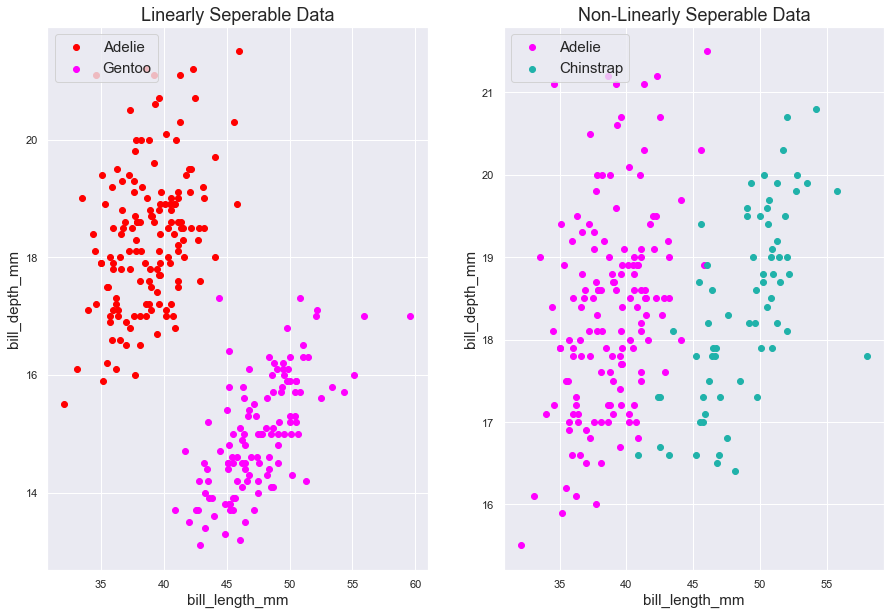

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv("palmer_penguins.csv")
df.dropna(inplace = True)

Adelie= df[df.species == "Adelie"]
Chinstrap = df[df.species == "Chinstrap"]
Gentoo = df[df.species == "Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "red", 
            label = "Adelie")
ax1.scatter(Gentoo.bill_length_mm, 
            Gentoo.bill_depth_mm, 
            color = "magenta", 
            label = "Gentoo")
ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("bill_depth_mm", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "magenta", 
            label = "Adelie")
ax2.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "lightseagreen", 
            label = "Chinstrap")
ax2.set_xlabel("bill_length_mm", fontsize = 15)
ax2.set_ylabel("bill_depth_mm", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

In [14]:
Adelie

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
147,147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


The graphs above look great! I would even say that the right plot is almost linearly separable, but for the purposes of testing logistic regression it should be good to test.


In [15]:
Chinstrap

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...,...
215,215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


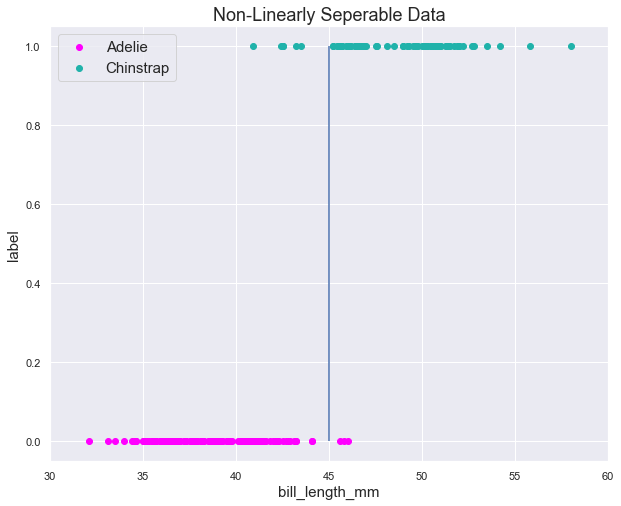

In [16]:
plt.figure(figsize = (10, 8))
plt.xlim((30, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
plt.vlines(45.0, 0.0, 1.0)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

The plot above demontrates the overlap region.

The step is to define a sigmoid function that would be used as an activation function in the Single Neuron Model.


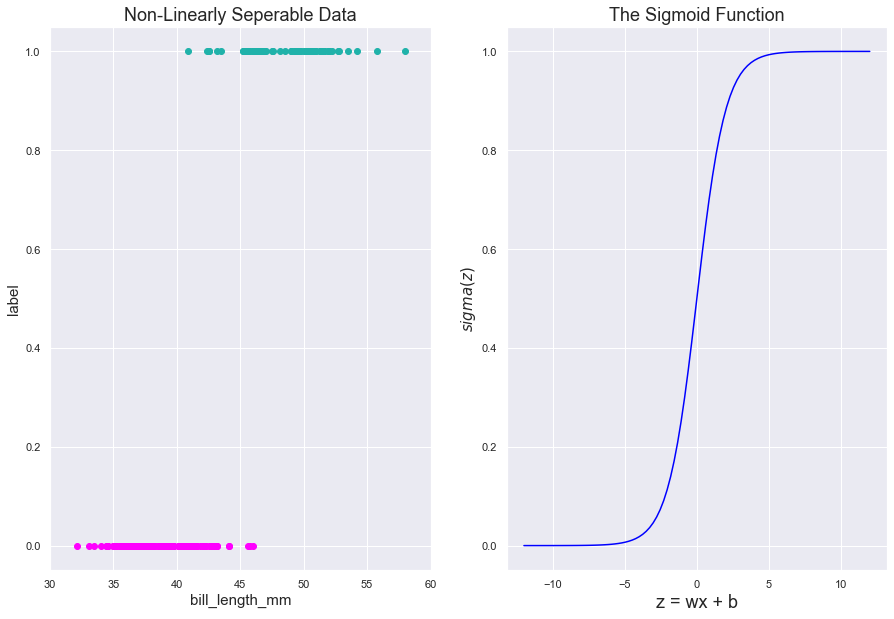

In [3]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((30, 60 ))
ax1.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
ax1.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [4]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

---
In Lecture Professor Davila has defined a custom ```SingleNeuron``` for training the model. The next step is definition of the function for the binary cross entropy loss. 
Before feeding the features into the model, the data needs to be prepared:  convert the Adelie and Chinstrap penguins'bill lengths to a ```numpy.ndarray``` and reshape it into a column vector representation (**recall that this is necessary whenever our feature measurements consist of a single measurement**). We then need to create a target $y$ ```numpy.ndarray``` which assigns the labels 0 and 1 to the Adelie and Chinstrap species, respectively. 



Once we have our feature vector and target vector we can then pass these values into the ```SingleNeuron.train()``` method to train our logistic single neuron with stochastic gradient descent. 

---

In [5]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[:220].bill_length_mm.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[:220].species == "Adelie", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

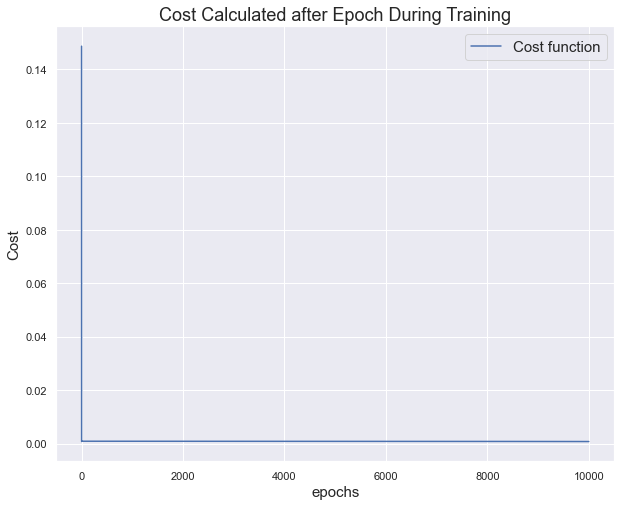

In [33]:
node.plot_cost_function()
plt.show()

The cost function drops in the first iteration, so probably there is not need for 10000 epochs. Let's try to decrease the number of epochs.

In [6]:
node.train(X, y, alpha = 0.01, epochs = 1000)

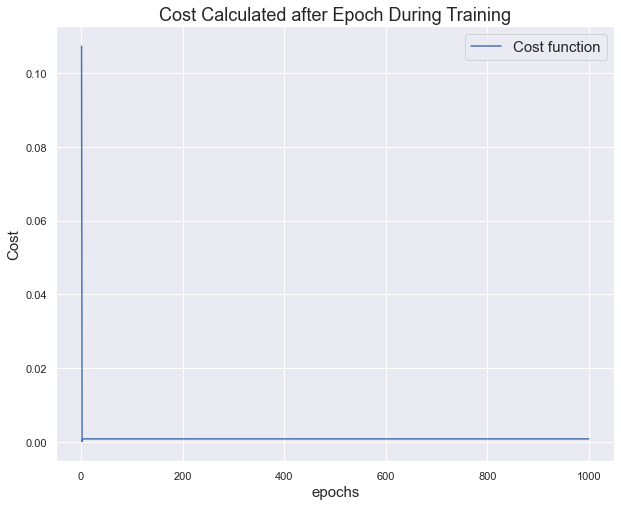

In [40]:
node.plot_cost_function()
plt.show()

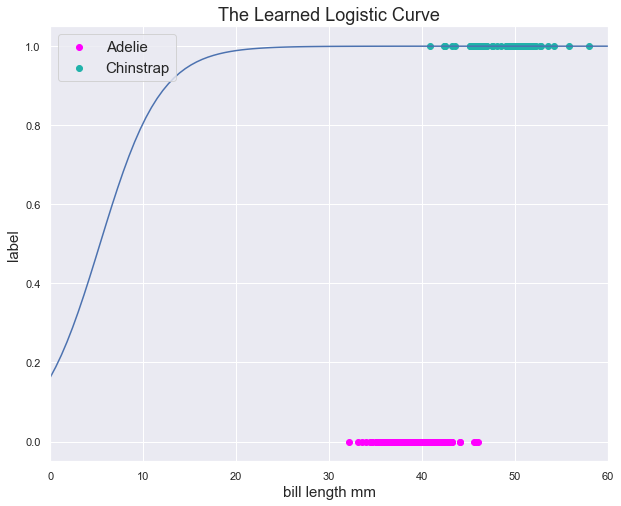

In [41]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

I think what is happening with the sigmoid is overfitting with the number of epochs. So I would try to decrease number of epochs to 10 and see if sigmoid would shit do the desired result.

In [43]:
node.train(X, y, alpha = 0.01, epochs = 10)

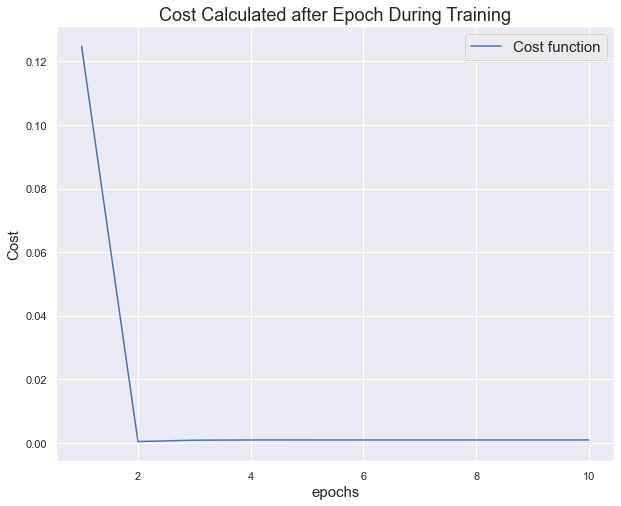

In [44]:
node.plot_cost_function()
plt.show()

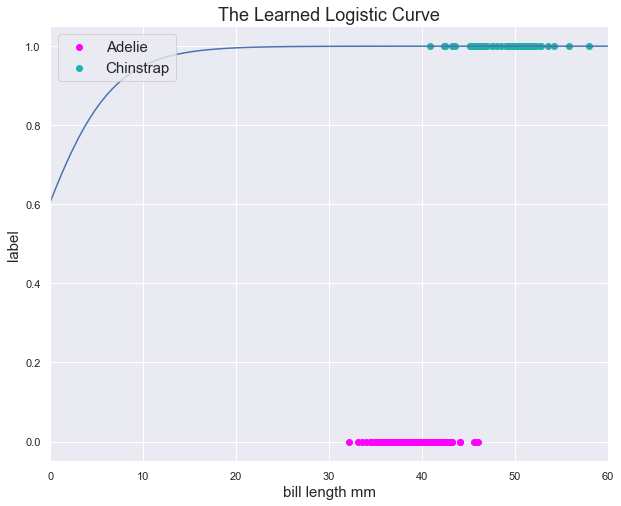

In [45]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

So the results got worse. Let's increase the number of epochs to 100.

In [46]:
node.train(X, y, alpha = 0.01, epochs = 100)

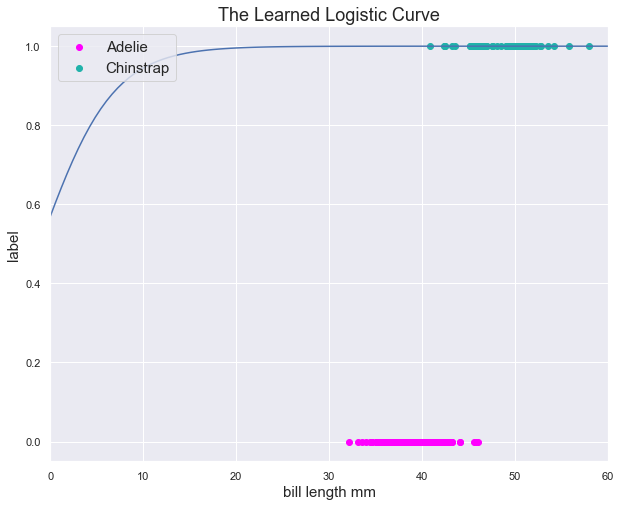

In [47]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Maybe the learning rate alpha is the parameter for tuning. Number of epochs I would increase to 1000 and alpha to 0.1.

In [48]:
node.train(X, y, alpha = 0.1, epochs = 1000)

<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


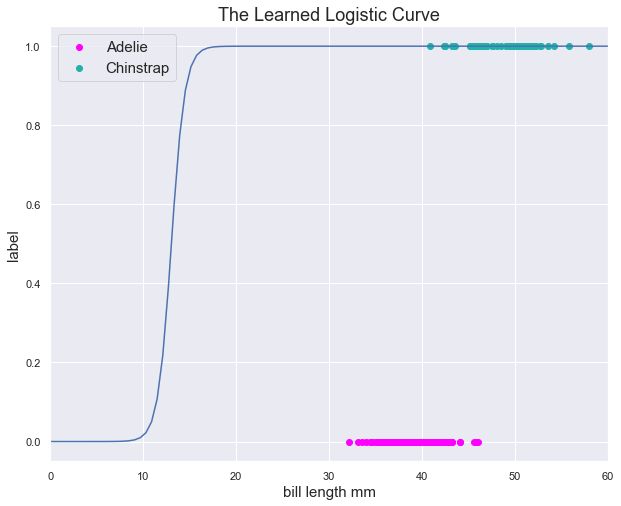

In [49]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

I think it is better, because now we at least see the sigmoid shape. Let's increase alpha to 0.5.

In [50]:
node.train(X, y, alpha = 0.5, epochs = 1000)

<ipython-input-18-0d7b9cc9958d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))
<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


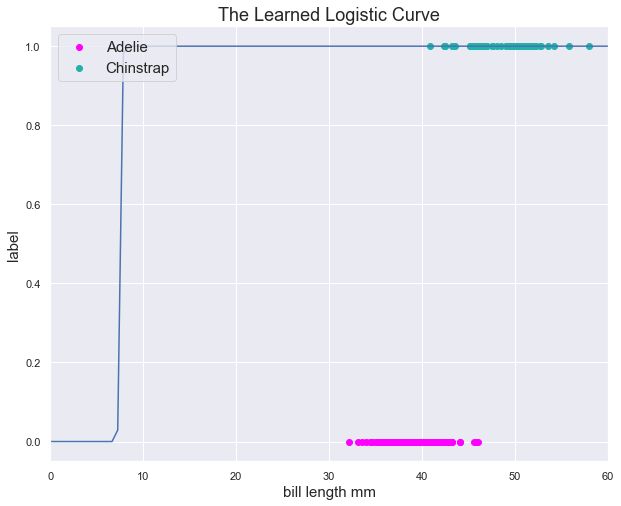

In [51]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Okay, 0.5 is too big and it is visible from the shapr edges. Alpha=0.1, epochs=5000.

In [52]:
node.train(X, y, alpha = 0.1, epochs = 5000)

<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


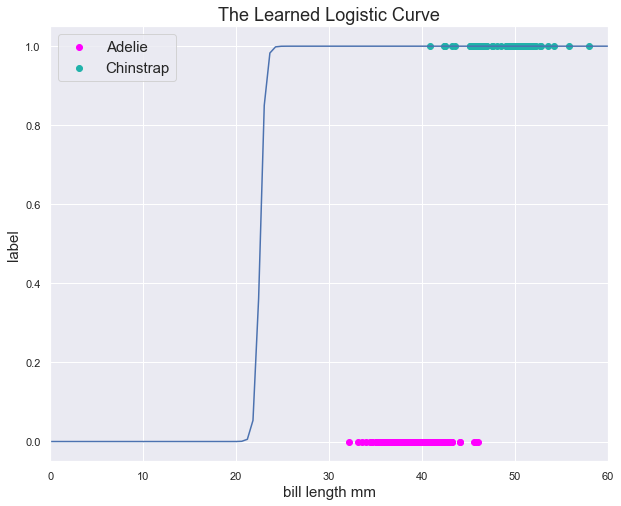

In [53]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

Maybe afterall the number of epochs needs to be 10000?

In [54]:
node.train(X, y, alpha = 0.1, epochs = 10000)

<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-32-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


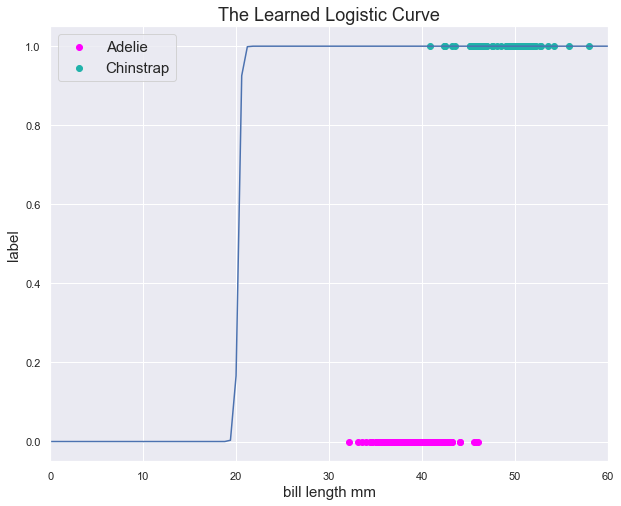

In [55]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [56]:
node.train(X, y, alpha = 0.0001, epochs = 10000)

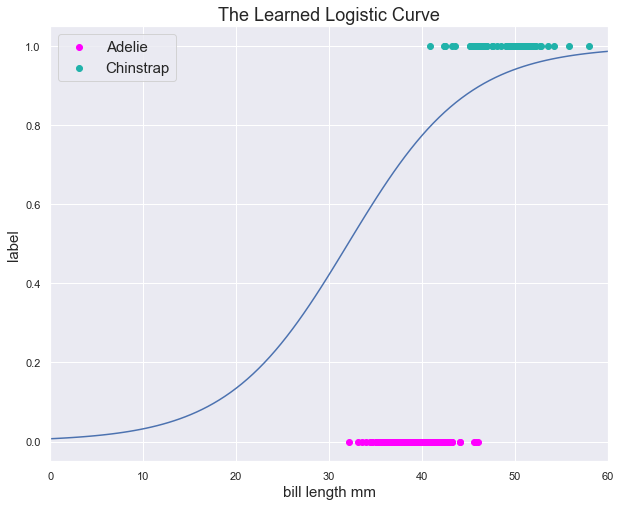

In [57]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [58]:
node.train(X, y, alpha = 0.00001, epochs = 10000)

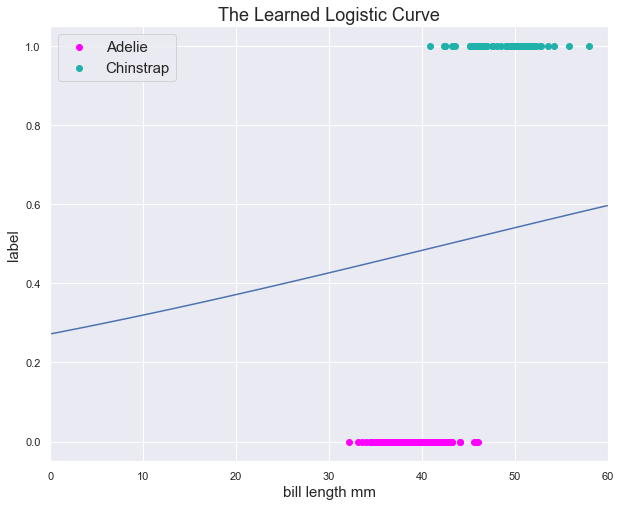

In [59]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

I would stop on alpha=0.001 and 10000 epochs. 

In [7]:
node.train(X, y, alpha = 0.001, epochs = 10000)

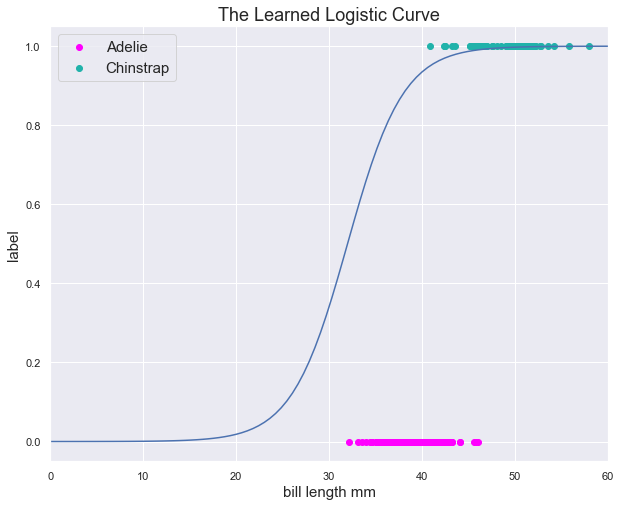

In [61]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(0, 60, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

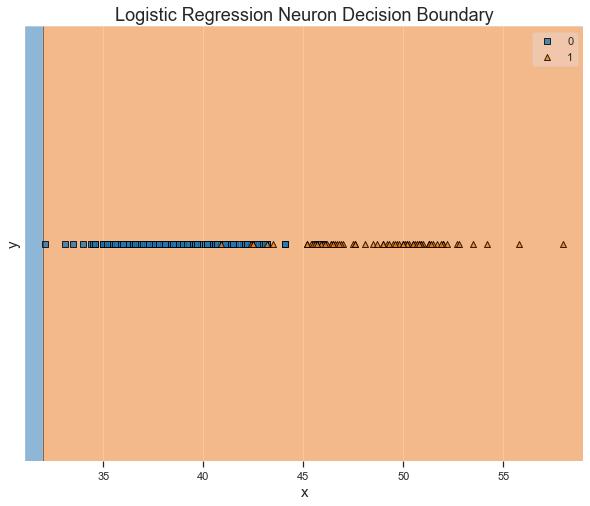

In [62]:
node.plot_decision_boundary(X, y)
plt.show()

Interesting result. 

___





Comparison with Logistic Regression classifier from SciKit-Learn. It did perform better.
--




In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

0.95

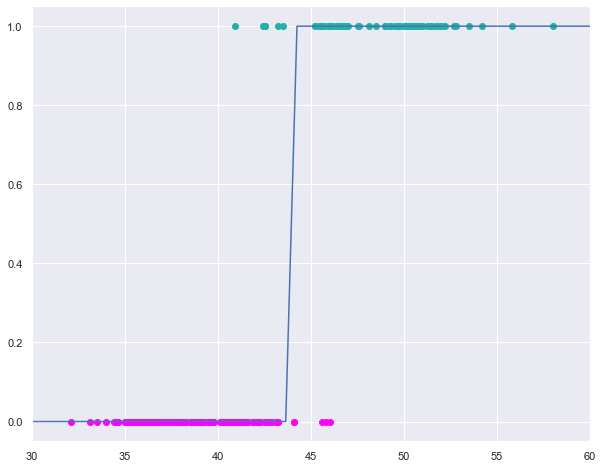

In [67]:
plt.figure(figsize = (10, 8))
plt.xlim((30, 60 ))
plt.scatter(Adelie.bill_length_mm, 
            np.zeros(146), 
            color = "magenta", 
            label = "Adelie")
plt.scatter(Chinstrap.bill_length_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
domain = np.linspace(0, 60, 100)
plt.plot(domain, clf.predict(domain.reshape(-1, 1)))
plt.show()

---

## Logistic Regression Single Neuron with Multiple Inputs
In this part I would use two features: ```bill length``` and ```flipper length```.

Let's run the ```SingleNeuron``` model with bill length and flipper length measurements as input, train this model with the last used learning rate and number of epochs as the variable ```node```, and then compare the cost function over epochs between the two models. 

<ipython-input-5-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-5-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-3-0d7b9cc9958d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


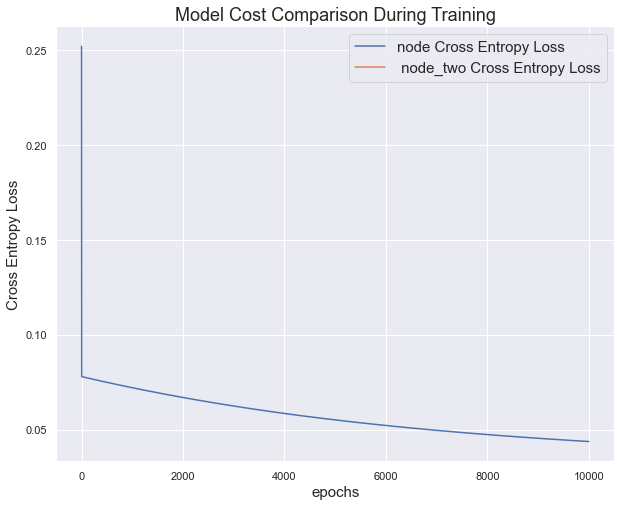

In [14]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of bill length and flipper length values for
# the Adelie and Chinstrap penguin species, respectively. 
X_two = df.iloc[:220][["bill_length_mm", "flipper_length_mm"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

In [15]:
node_two.errors_

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

For some reason the node_two_errors are all ```nan``` values.

<ipython-input-3-0d7b9cc9958d>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


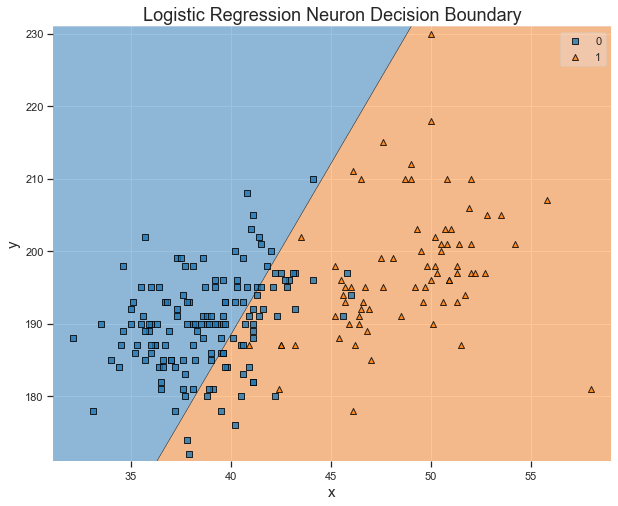

In [16]:
node_two.plot_decision_boundary(X_two, y)


Next, I would like to try different features: ```

<ipython-input-5-1c9c14108ff5>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-5-1c9c14108ff5>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


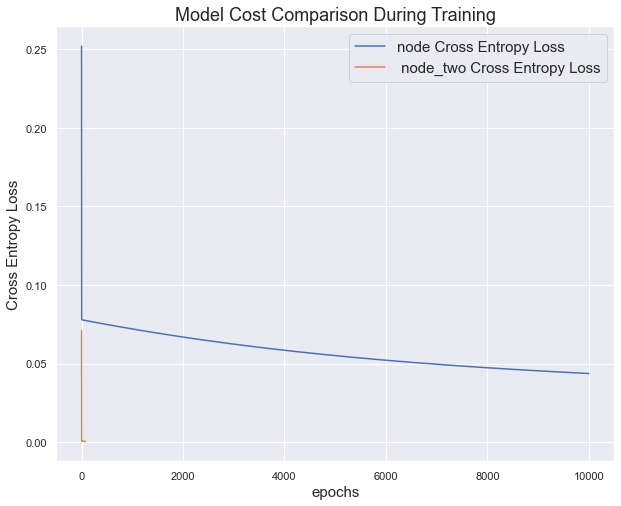

In [17]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of bill length and flipper length values for
# the Adelie and Chinstrap penguin species, respectively. 
X_two = df.iloc[:220][["bill_length_mm", "bill_depth_mm"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

In [18]:
node_two.errors_

[0.07105572846259077,
 0.0006926280767971801,
 0.0006809073224695238,
 0.0006809896578050667,
 0.0006815499345389382,
 0.0006818841682462065,
 0.0006819735353773588,
 0.0006818407180987309,
 0.0006815074614661185,
 0.0006809924310895901,
 0.0006803116542531985,
 0.0006794790214543326,
 0.000678506692217319,
 0.0006774054090049937,
 0.0006761847339626245,
 0.0006748532231897454,
 0.0006734185518549588,
 0.0006718876017009075,
 0.0006702665206187462,
 0.0006685607621711443,
 0.0006667751113071695,
 0.000664913701091458,
 0.0006629800240782783,
 0.0006609769409910444,
 0.000658906688598129,
 0.000656770888081038,
 0.0006545705547401896,
 0.0006523061095507357,
 0.000649977392840827,
 0.0006475836801948049,
 0.0006451237005693845,
 0.0006425956565341152,
 0.0006399972465008033,
 0.0006373256887787349,
 0.0006345777472801198,
 0.0006317497586957873,
 0.0006288376609638861,
 0.000625837022861796,
 0.0006227430745598808,
 0.0006195507389893221,
 0.0006162546638889125,
 0.0006128492544127372,


I guess the nan values are appearing due to invalid division by zero in the later terms.

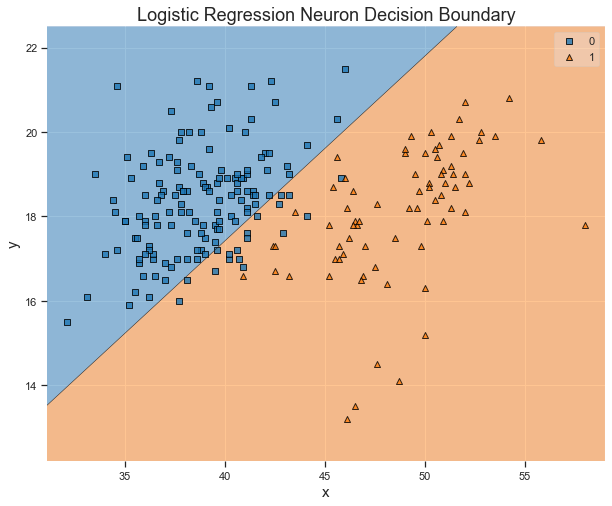

In [19]:
node_two.plot_decision_boundary(X_two, y)


Next I would like to try different activation and cost functions: sign function and MSE.

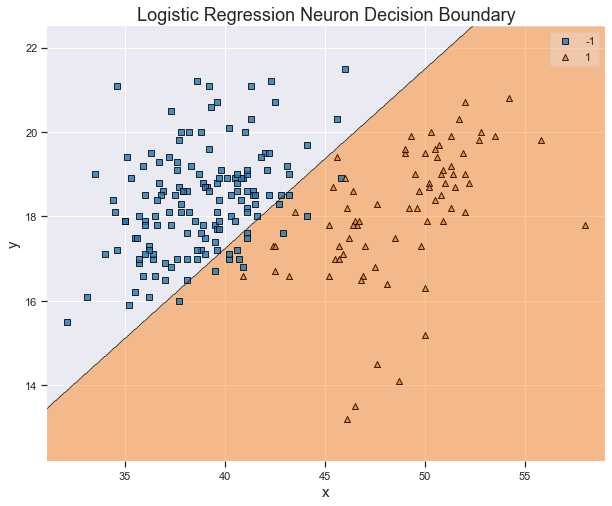

In [21]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

X_three = df.iloc[:220][["bill_length_mm", "bill_depth_mm"]].values

y_three = np.where(df.iloc[:220]["species"] == "Adelie", -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.01, epochs = 10_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

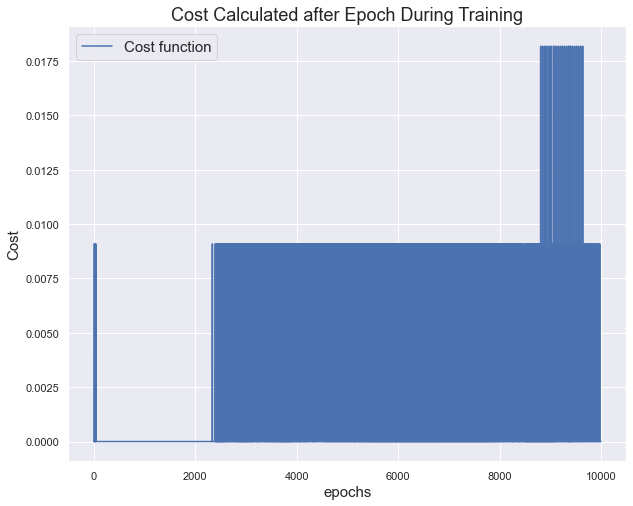

In [22]:
node_three.plot_cost_function()

Let's try reducing the number of epochs to 3000.

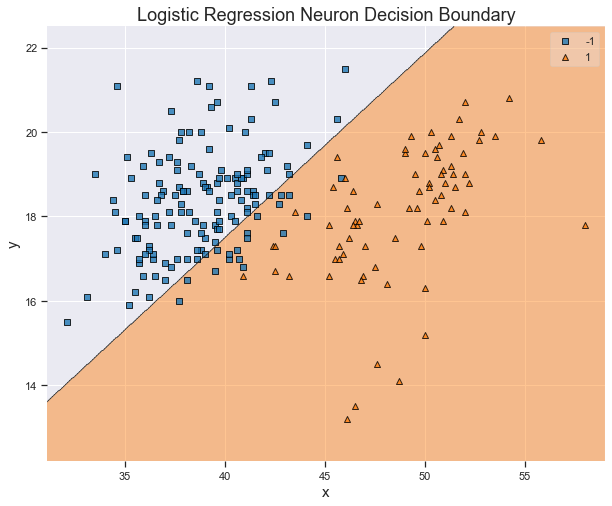

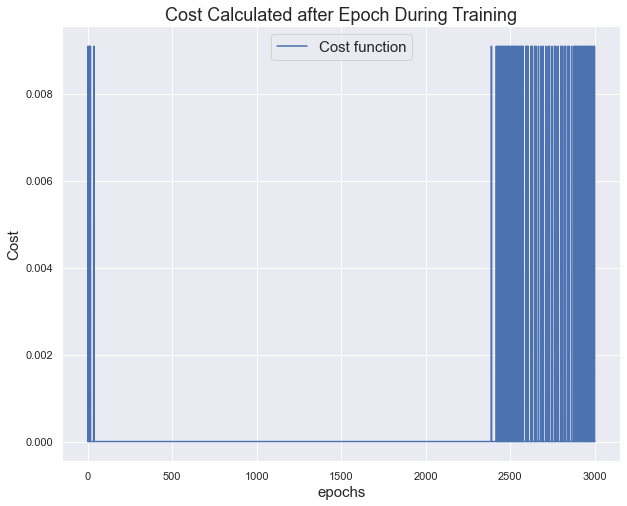

In [23]:
node_three.train(X_three, y_three, alpha = 0.01, epochs = 3_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()
node_three.plot_cost_function()

The cost function is actually very close to zero.

## Conslusion
As per my observation the two feature Neuron performed better in differentiating between Adelie and Chinstrap. The different actionvation functions performed similarly. 
Also it is important to choose the learning rates and the number of epochs. 